# DISCLAIMER  
## I'm a Year 1 Science Student at the Hong Kong Baptist University and i am doing a Summer Program on Data Science. Prior to this i have no experience whatsoever and my accumulated experience is approximately that of two weeks.  
## The below code is very messy and there are some places where some code may be unnecessary and very inefficient. I, however, am unaware of this due to my lack of knowledge in this area. Please do guide me and point out areas where I am lacking and how I can improve

Tan Yu Hau Sean  
18200265@life.hkbu.edu.hk

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
titanicData = pd.read_csv('train.csv')
titanicData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print("Data Type:", type(titanicData))
print("Data Dims", titanicData.shape)

Data Type: <class 'pandas.core.frame.DataFrame'>
Data Dims (891, 12)


# Value Substitution

because regression needs to compute numerics, we have to alter Sex, and Embarked to numbers.  

## Sex: male = 1, female = 0  
## Embarked: C = 1, S = 2, Q = 3, Missing Value = 0  

In [4]:
titanicData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
titanicData.Sex.replace(to_replace = ['male', 'female'], value = [1, 0], inplace = True)
titanicData.Embarked.replace(to_replace = ['C', 'S', 'Q'], value = [1, 2, 3], inplace = True)

In [6]:
titanicData["Embarked"] = titanicData["Embarked"].fillna(0)

In [7]:
titanicData['Sex'] = titanicData['Sex'].astype('int64')
titanicData['Embarked'] = titanicData['Embarked'].astype('int64')

## Missing Values of Cabin

looking at Cabin data, most of the values are missing. This can be seen from more than 75% of data missing (204 out of 891 is NOT missing). So this is not valuable as a predictor. However, if someone has cabin, they paid a fare of at least 5.00.

In [8]:
CabinData = titanicData[titanicData.Cabin.notnull()]
display(CabinData)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,2
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16.7000,G6,2
11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,26.5500,C103,2
21,22,1,2,"Beesley, Mr. Lawrence",1,34.0,0,0,248698,13.0000,D56,2
23,24,1,1,"Sloper, Mr. William Thompson",1,28.0,0,0,113788,35.5000,A6,2
27,28,0,1,"Fortune, Mr. Charles Alexander",1,19.0,3,2,19950,263.0000,C23 C25 C27,2
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,NaN,1,0,PC 17569,146.5208,B78,1
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",0,49.0,1,0,PC 17572,76.7292,D33,1


## Missing Values of Age

to address the missing values of age, we can either:  

1) Fill in the missing values with the average age of passengers,  
2) Fill in the missing values with the median age of passengers,  
3) Remove all data points with missing values of age.

In [9]:
titanicData["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

So, for "Age" Column:  
1) Mean is 29.7 years old.  
2) Median is 28.0 years old.  
3) there is 177 data sets missing, which is 19.9% of data missing.  

In consideration of this, two separate datasets will be made to consider each scenario and to see if there are any major deviations due to method of filling in missing value. This is because method 3 has approximately 20% of data missing. such a large number of missing data will have large bias on results.

In [10]:
TitanicMean = titanicData.copy(deep = True)
TitanicMedian = titanicData.copy(deep = True)

In [11]:
TitanicMean["Age"] =  TitanicMean["Age"].fillna(29.7)
TitanicMedian["Age"] = TitanicMedian["Age"].fillna(28.0)

In [12]:
display(TitanicMean)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2
5,6,0,3,"Moran, Mr. James",1,29.7,0,0,330877,8.4583,NaN,3
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,2
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,1


In [13]:
display(TitanicMedian)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2
5,6,0,3,"Moran, Mr. James",1,28.0,0,0,330877,8.4583,NaN,3
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,2
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,1


## Isolating Variables that have effect on Survival  

as of now, variables most likely to have an effect are Pclass, Sex, Age, SibSp, Parch, Fare and (PROBABLY) Embarked.  

Variables that are likely to not be useful are Name, Ticket as well as PassengerId.  
1) Name has no effect on any calculations made. It is not even a categorical variable but a set of strings which cannot even help us predict age.  
2) Ticket is also a major problem as there does not seem to be any directly visible association between ticket number with the fare paid nor Pclass which is the class of cabin.  
3) PassengerId is not helpful as it is just a measure to numerically keep track of total number of attendees on boat.

## Isolating Categorical Variables

In [14]:
TitanicMeanCatVar = pd.DataFrame(TitanicMean[["Survived", "Pclass", "Sex",
                                               "Embarked"]])
TitanicMedianCatVar = pd.DataFrame(TitanicMedian[["Survived", "Pclass", "Sex",
                                               "Embarked"]])

In [15]:
for var in TitanicMeanCatVar:
    TitanicMeanCatVar[var] = TitanicMeanCatVar[var].astype('category')
    
for var in TitanicMedianCatVar:
    TitanicMedianCatVar[var] = TitanicMedianCatVar[var].astype('category')

## Isolating Numerical Variables

In [16]:
TitanicMeanNumVar = pd.DataFrame(TitanicMean[[ "Age", "Fare", "SibSp","Parch"]])
TitanicMedianNumVar = pd.DataFrame(TitanicMedian[[ "Age", "Fare", "SibSp","Parch"]])

In [17]:
TitanicMeanNumVar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
Age      891 non-null float64
Fare     891 non-null float64
SibSp    891 non-null int64
Parch    891 non-null int64
dtypes: float64(2), int64(2)
memory usage: 27.9 KB


# Exploratory Analysis

## Observing the Distribution of Numeric Variables

mean

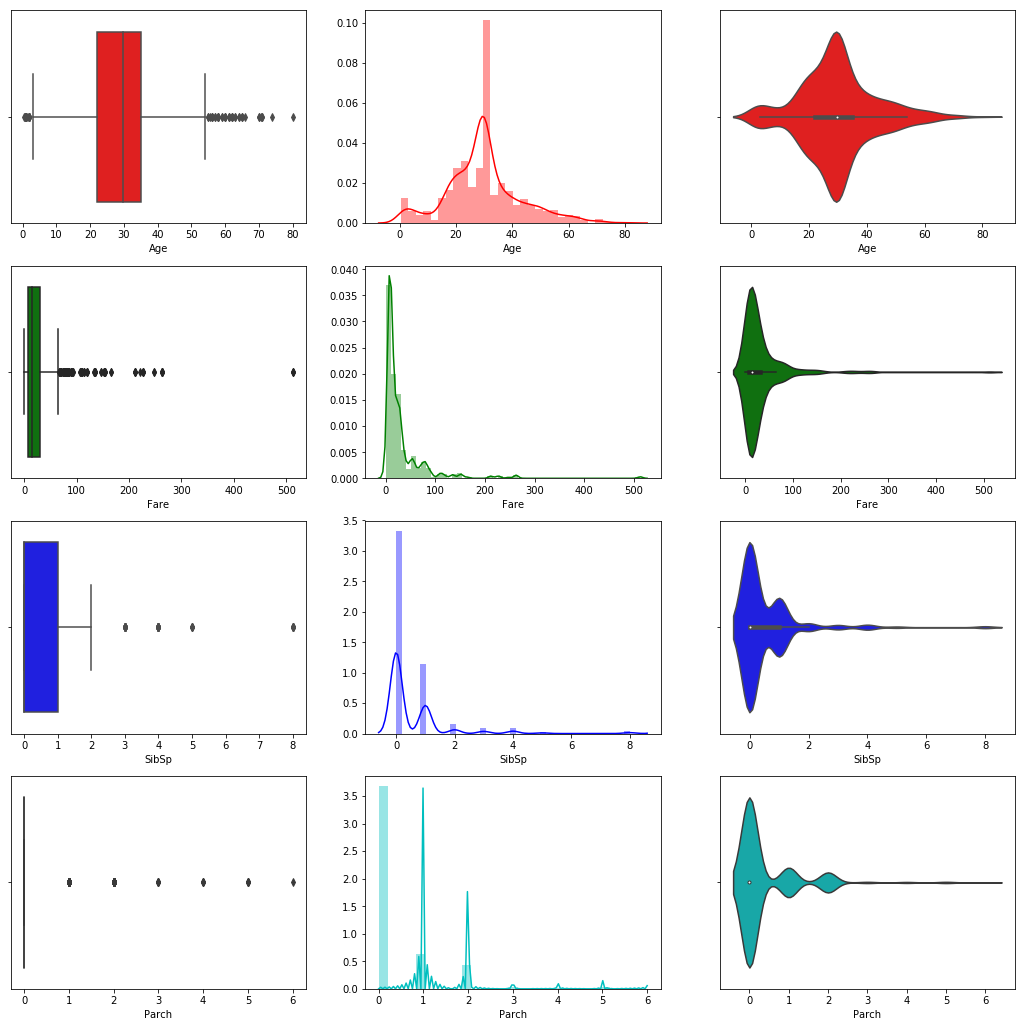

In [18]:
# Draw the distributions of all variables
f, axes = plt.subplots(4, 3 , figsize=(18, 18))
colors = ["r", "g", "b", "c"]

count = 0
for var in TitanicMeanNumVar:
    sb.boxplot(TitanicMeanNumVar[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.distplot(TitanicMeanNumVar[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(TitanicMeanNumVar[var], color = colors[count], ax = axes[count,2])
    count += 1

median

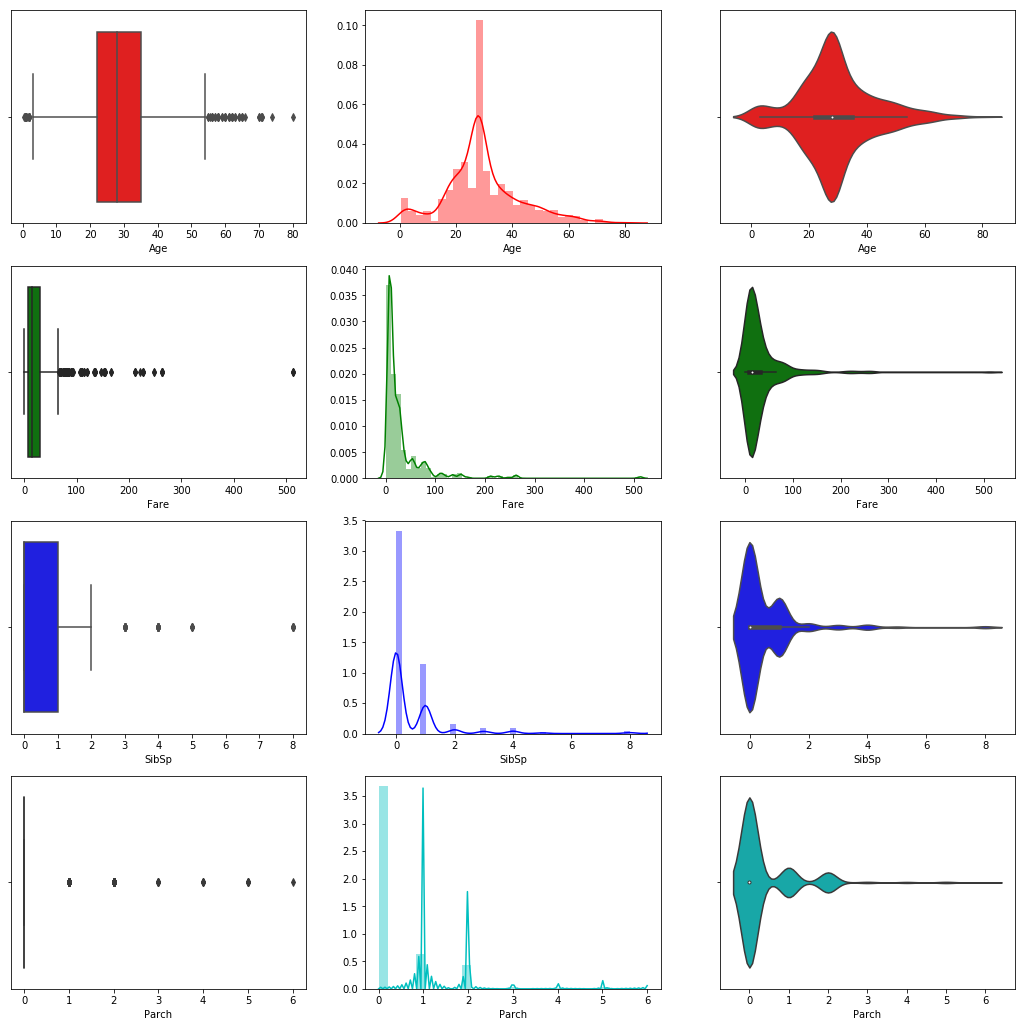

In [19]:
# Draw the distributions of all variables
f, axes = plt.subplots(4, 3 , figsize=(18,18))
colors = ["r", "g", "b", "c"]

count = 0
for var in TitanicMedianNumVar:
    sb.boxplot(TitanicMedianNumVar[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.distplot(TitanicMedianNumVar[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(TitanicMedianNumVar[var], color = colors[count], ax = axes[count,2])
    count += 1

## Observing the Categorical Variables

mean

0    549
1    342
Name: Survived, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
1    577
0    314
Name: Sex, dtype: int64
2    644
1    168
3     77
0      2
Name: Embarked, dtype: int64


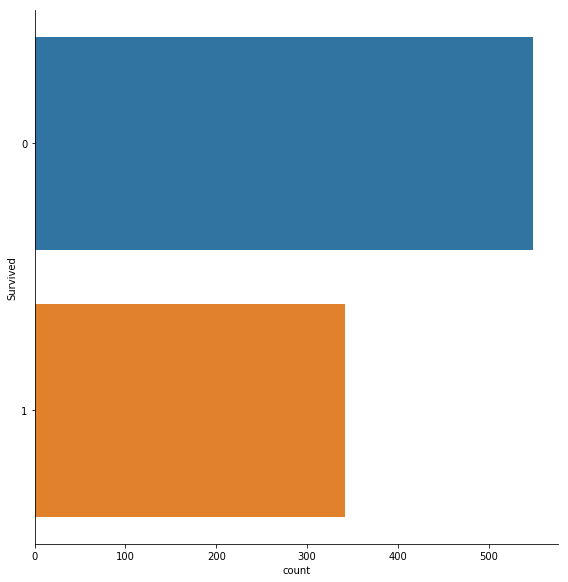

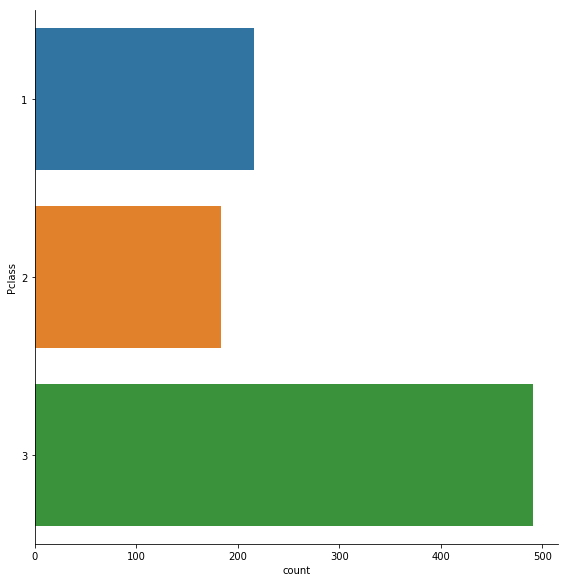

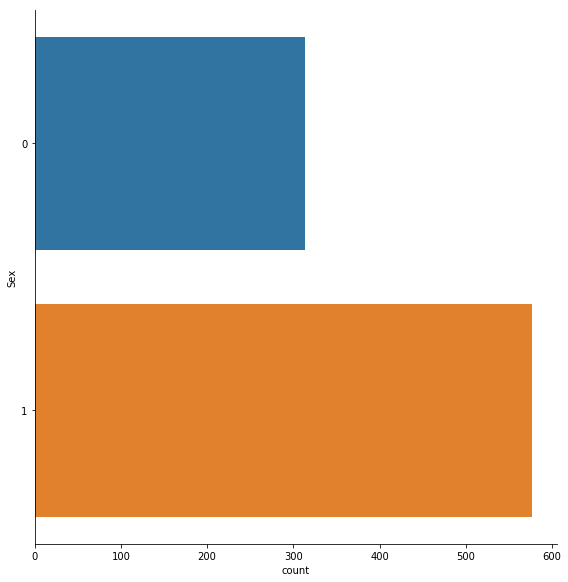

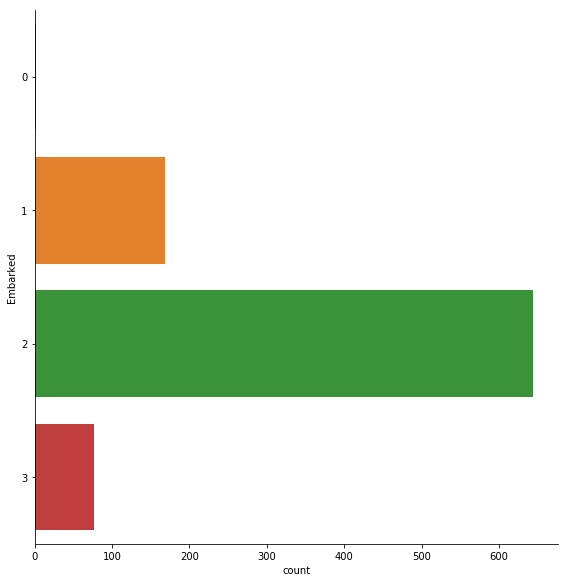

In [20]:
for i in TitanicMeanCatVar:
    print(TitanicMeanCatVar[i].value_counts())
    sb.catplot(y = i, data = TitanicMeanCatVar, kind = "count", height = 8)

median

0    549
1    342
Name: Survived, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
1    577
0    314
Name: Sex, dtype: int64
2    644
1    168
3     77
0      2
Name: Embarked, dtype: int64


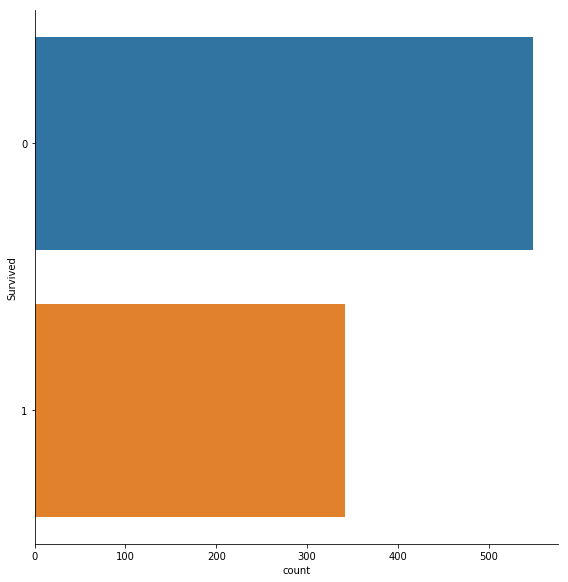

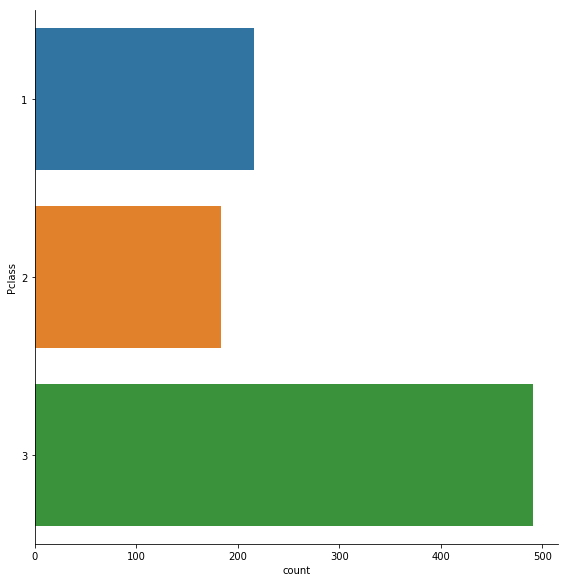

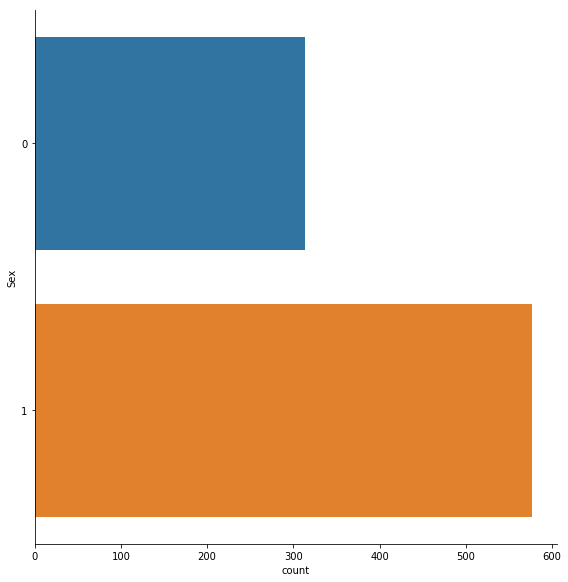

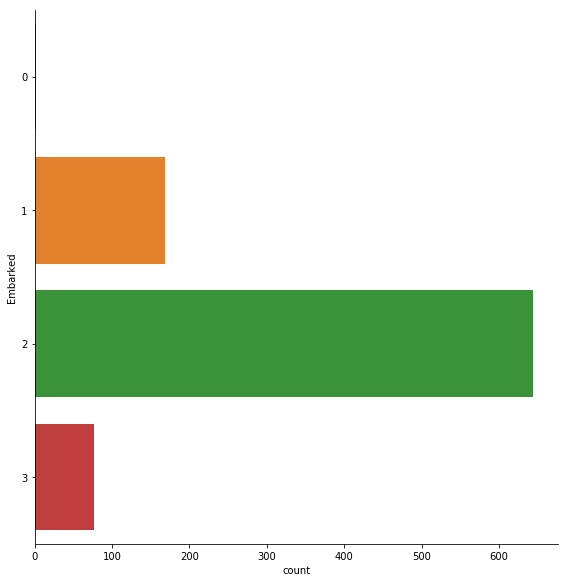

In [21]:
for i in TitanicMedianCatVar:
    print(TitanicMedianCatVar[i].value_counts())
    sb.catplot(y = i, data = TitanicMedianCatVar, kind = "count", height = 8)

## Heatmap to Check Correlation of Categorical Variables against Survival

mean

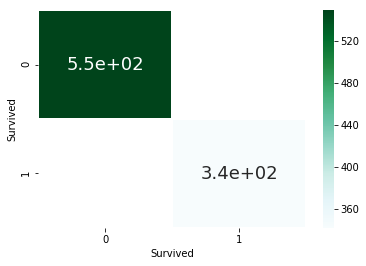

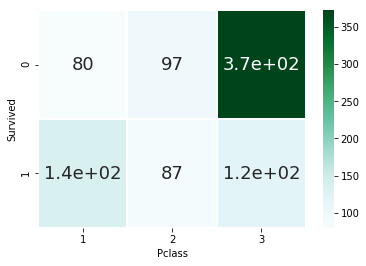

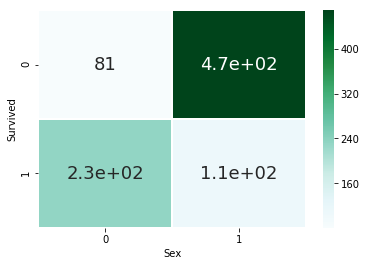

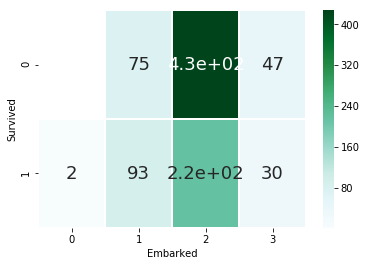

In [22]:
for i in TitanicMeanCatVar:
    f, axes = plt.subplots(1, 1)
    sb.heatmap(TitanicMeanCatVar.groupby(['Survived', i]).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn")

median

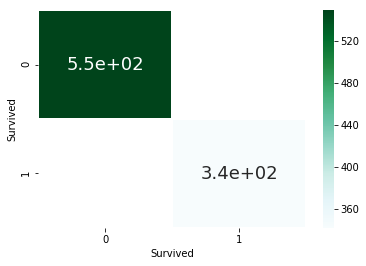

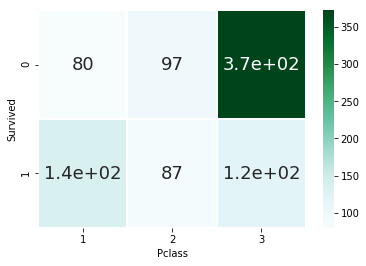

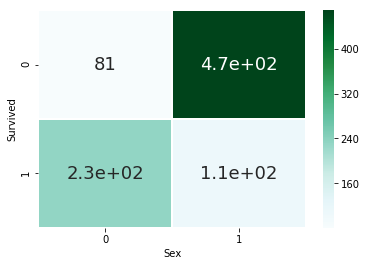

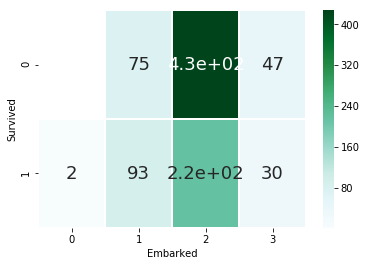

In [23]:
for i in TitanicMedianCatVar:
    f, axes = plt.subplots(1, 1)
    sb.heatmap(TitanicMedianCatVar.groupby(['Survived', i]).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn")

## Plotting Numerical Variables Against Survived

mean

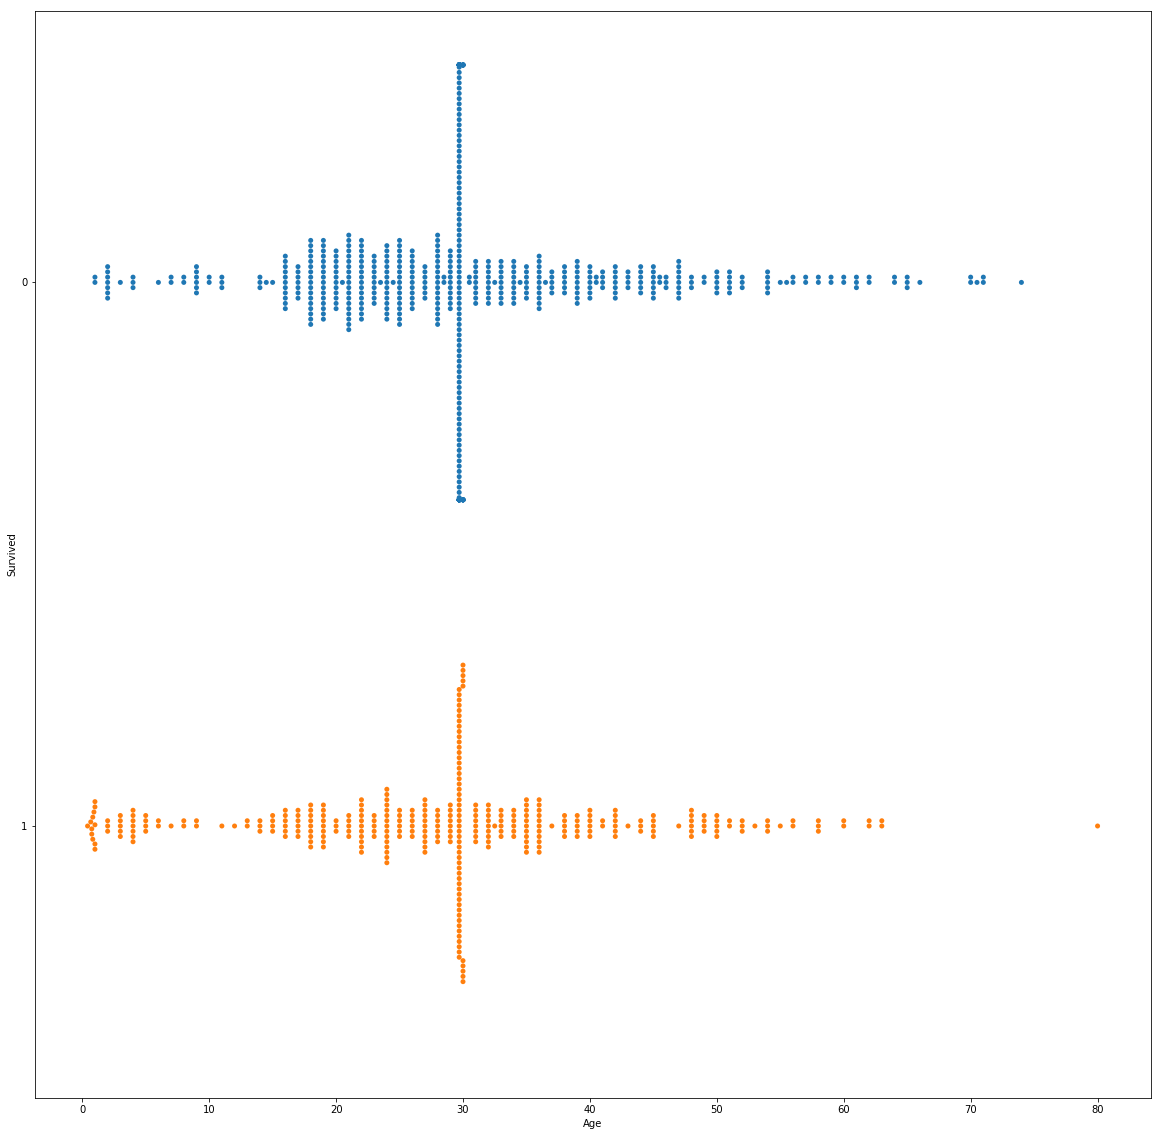

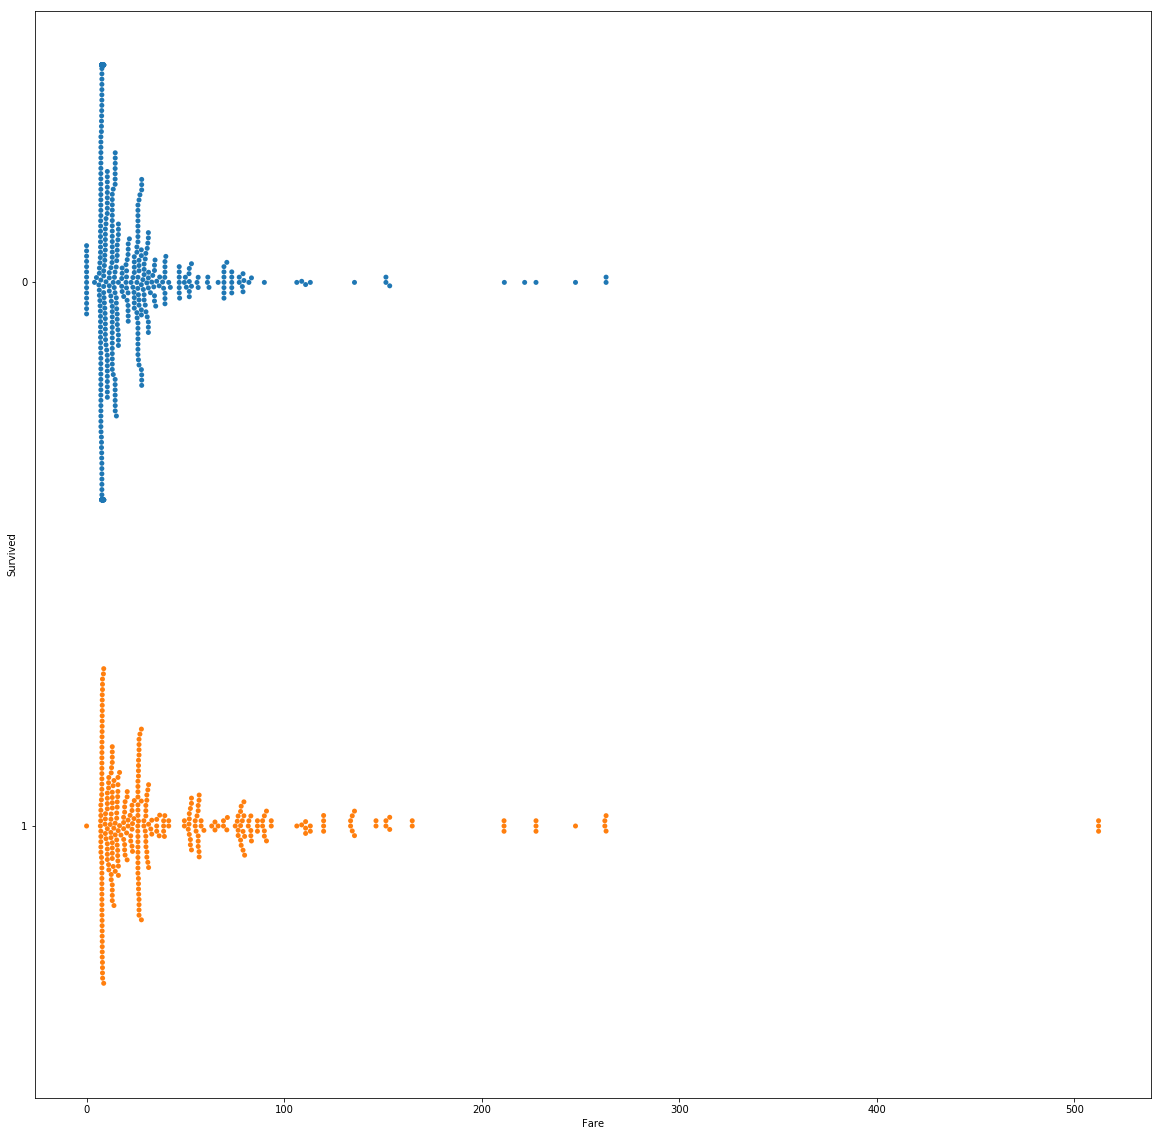

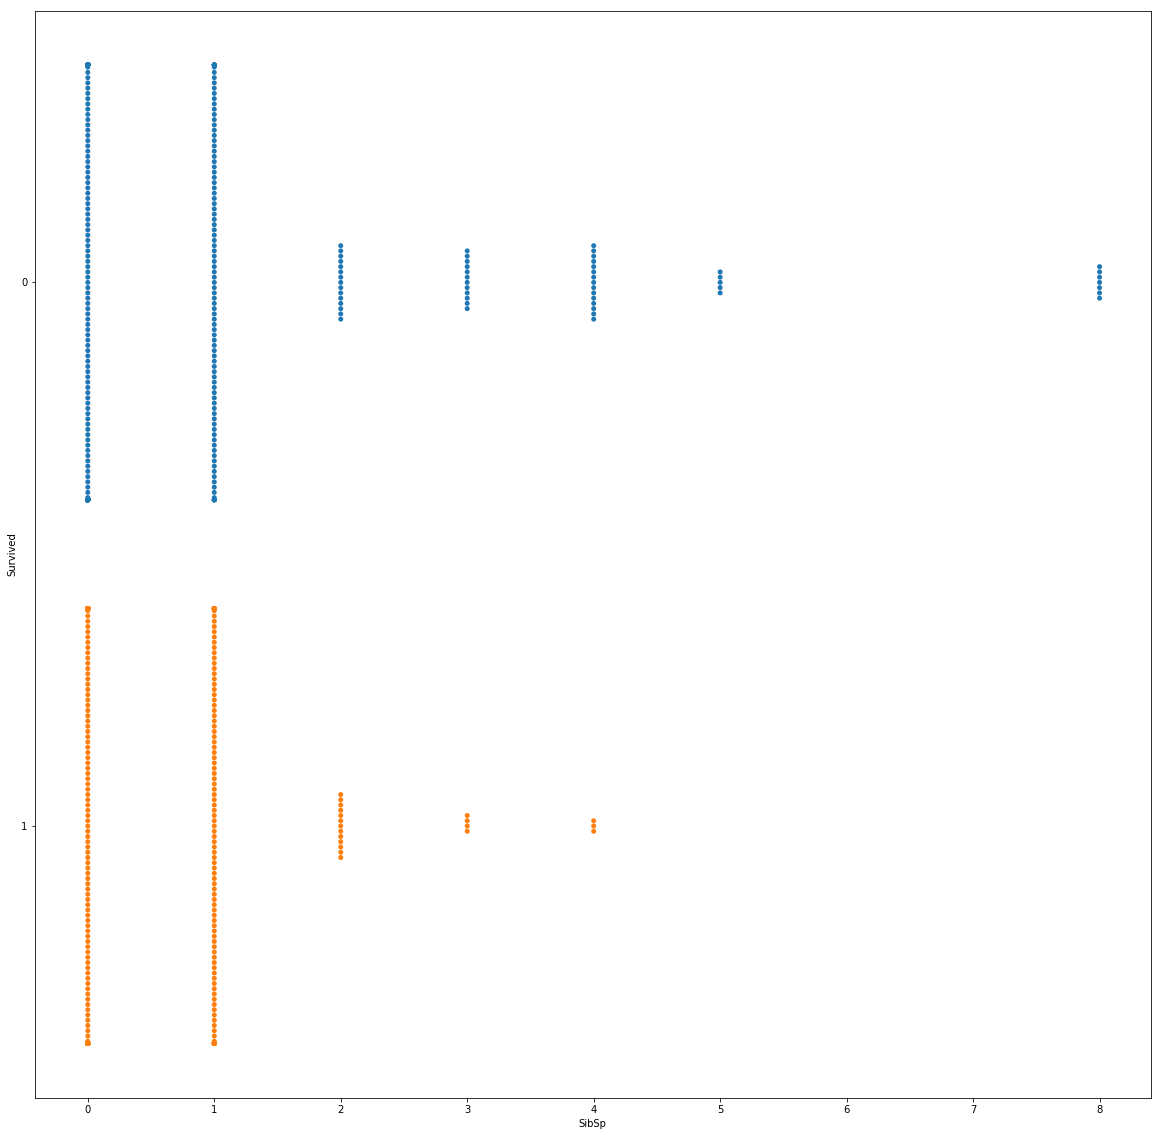

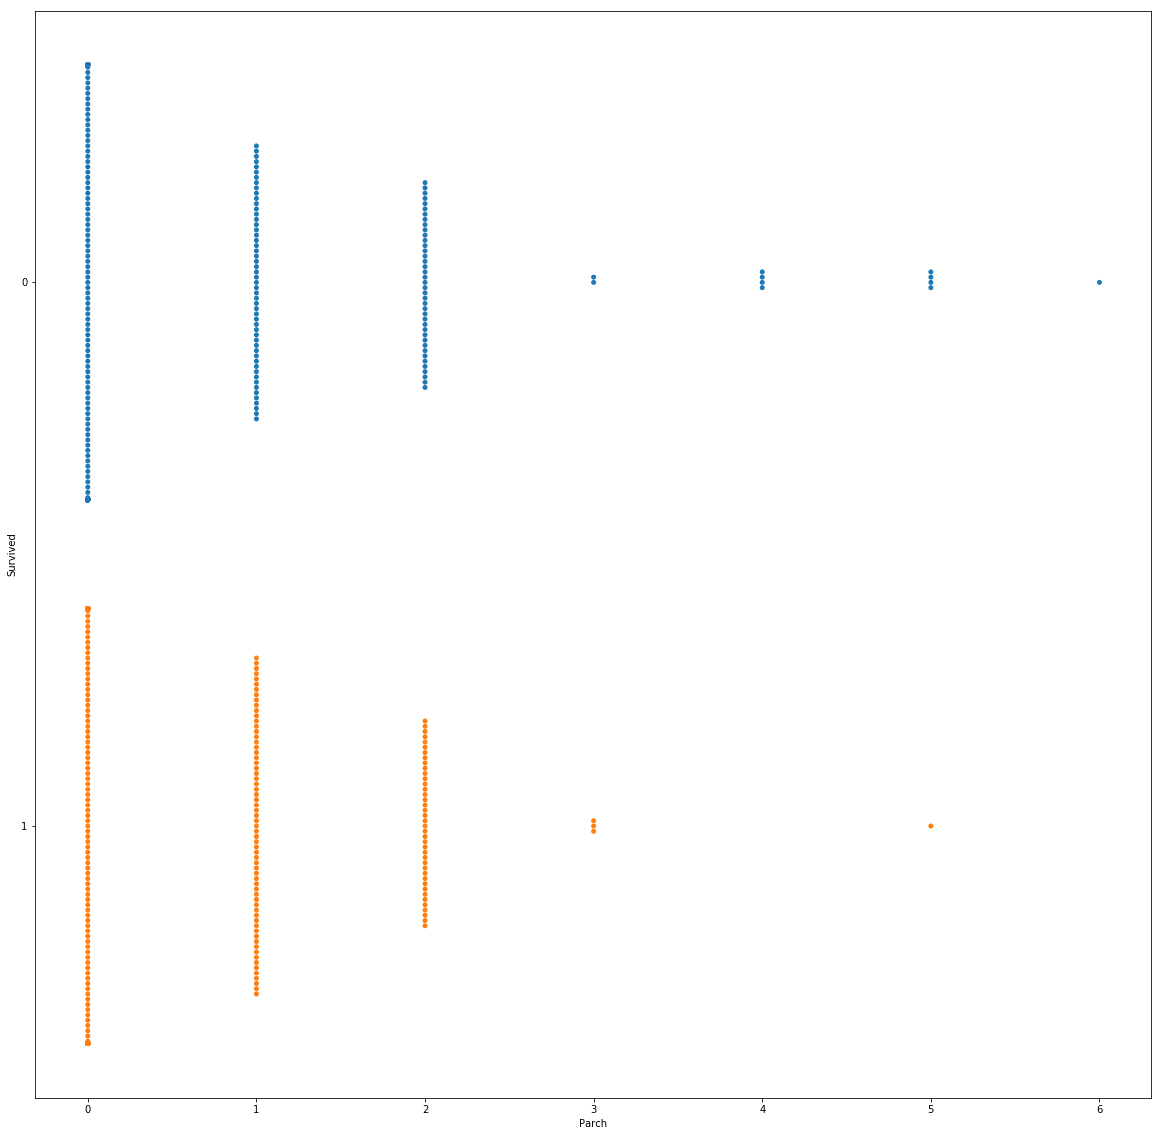

In [24]:
for var in TitanicMeanNumVar:
    f, axes = plt.subplots(1, 1, figsize=(20, 20))
    sb.swarmplot(x = var , y = TitanicMeanCatVar["Survived"], data = TitanicMeanNumVar)

median

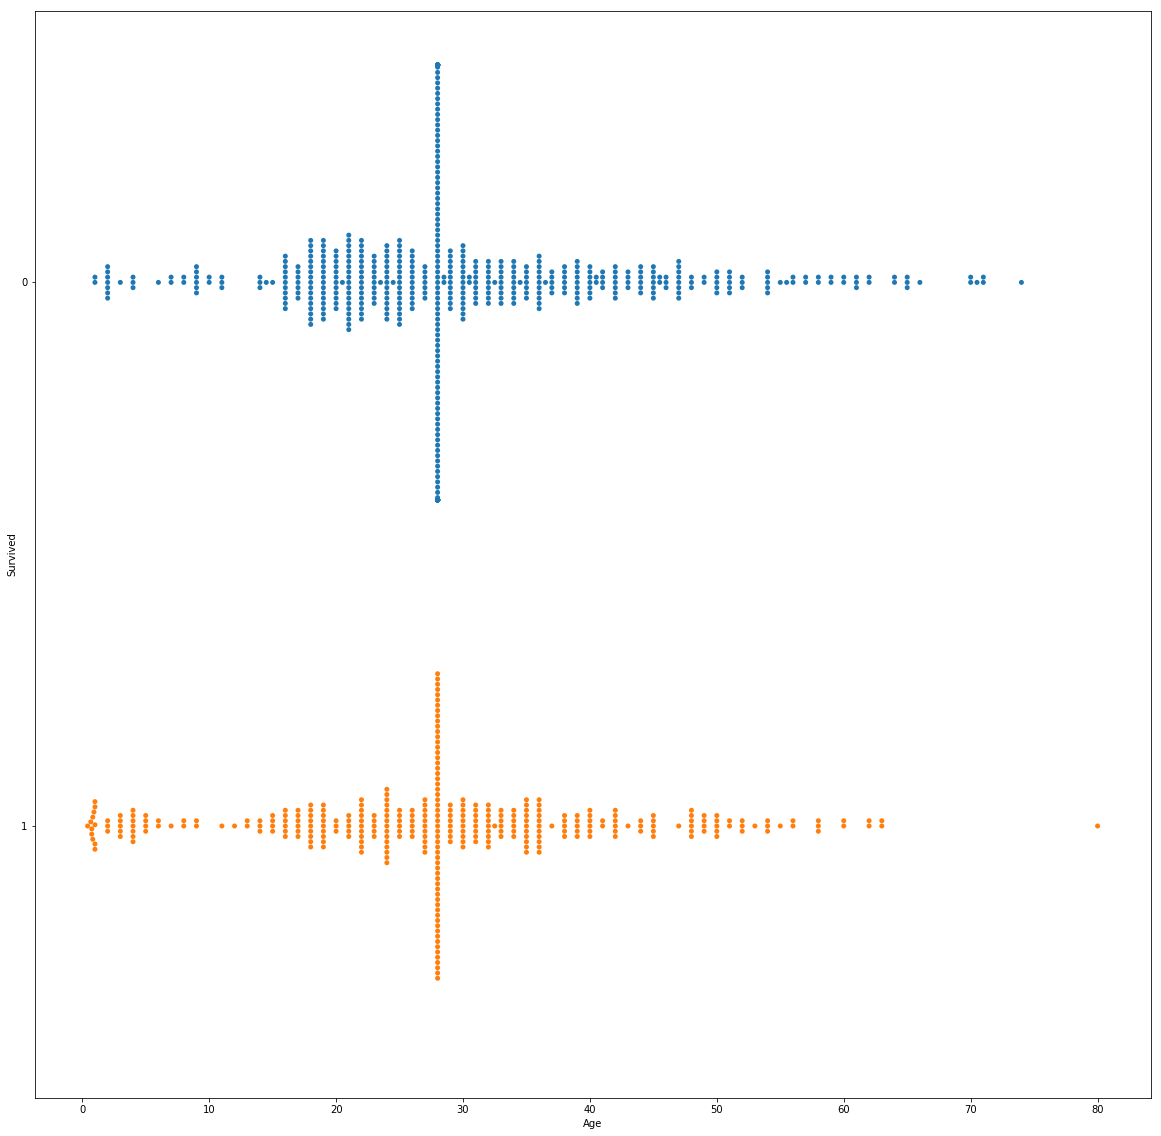

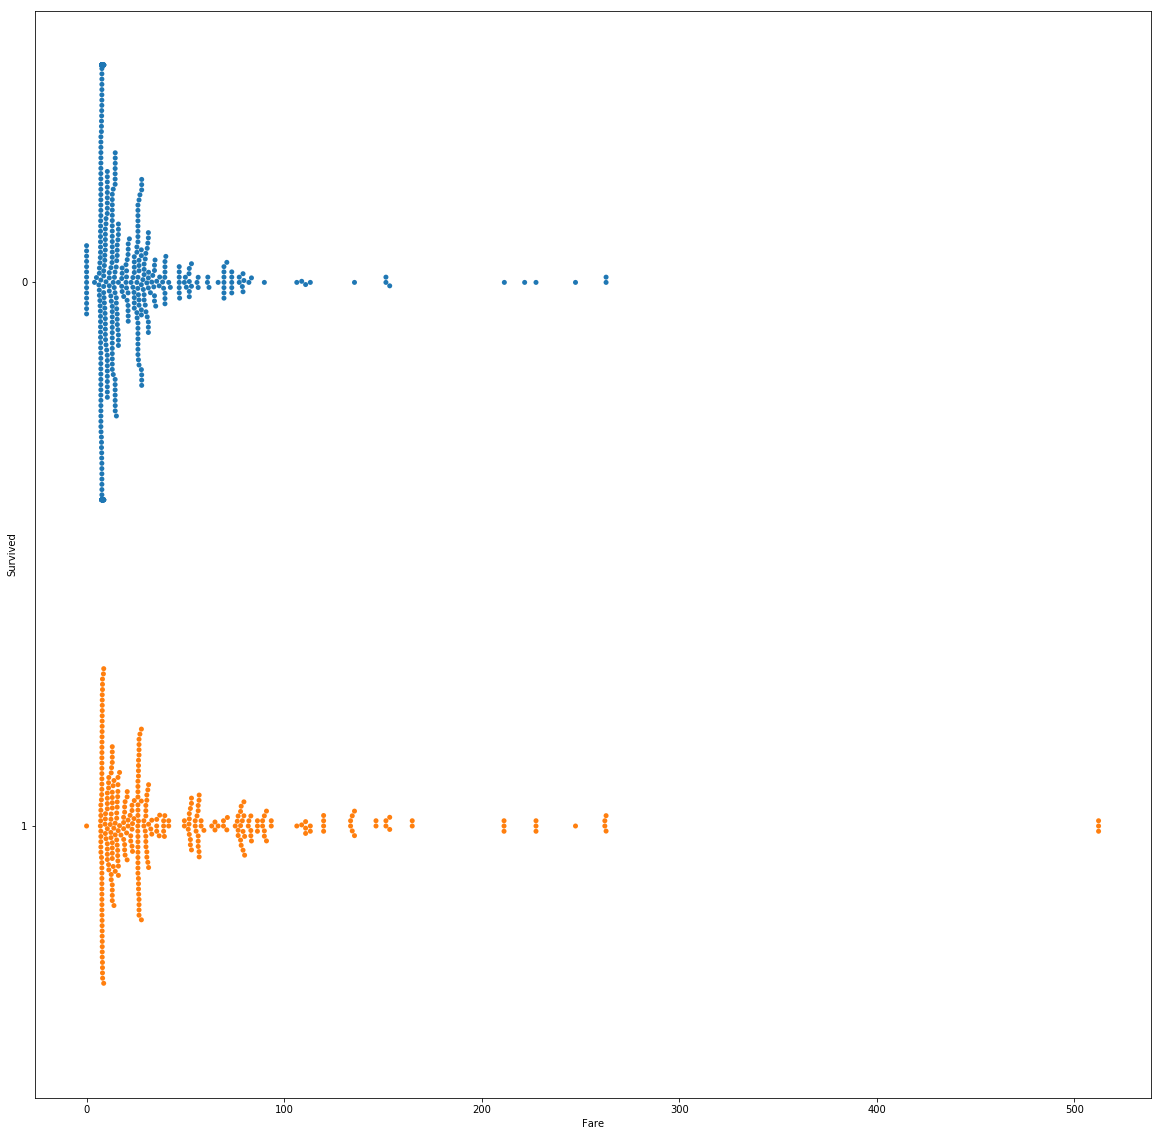

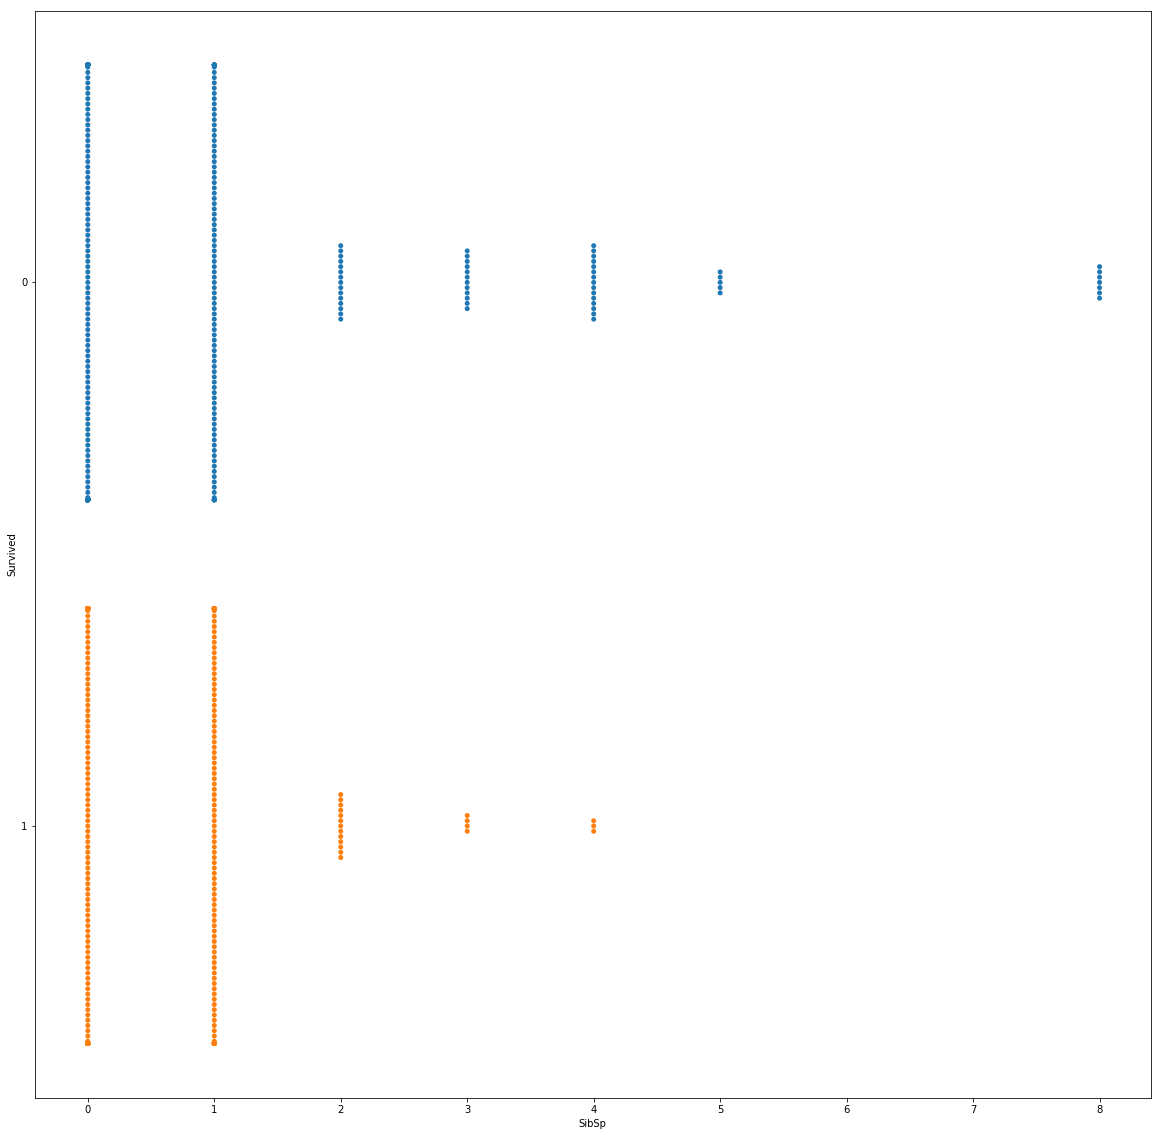

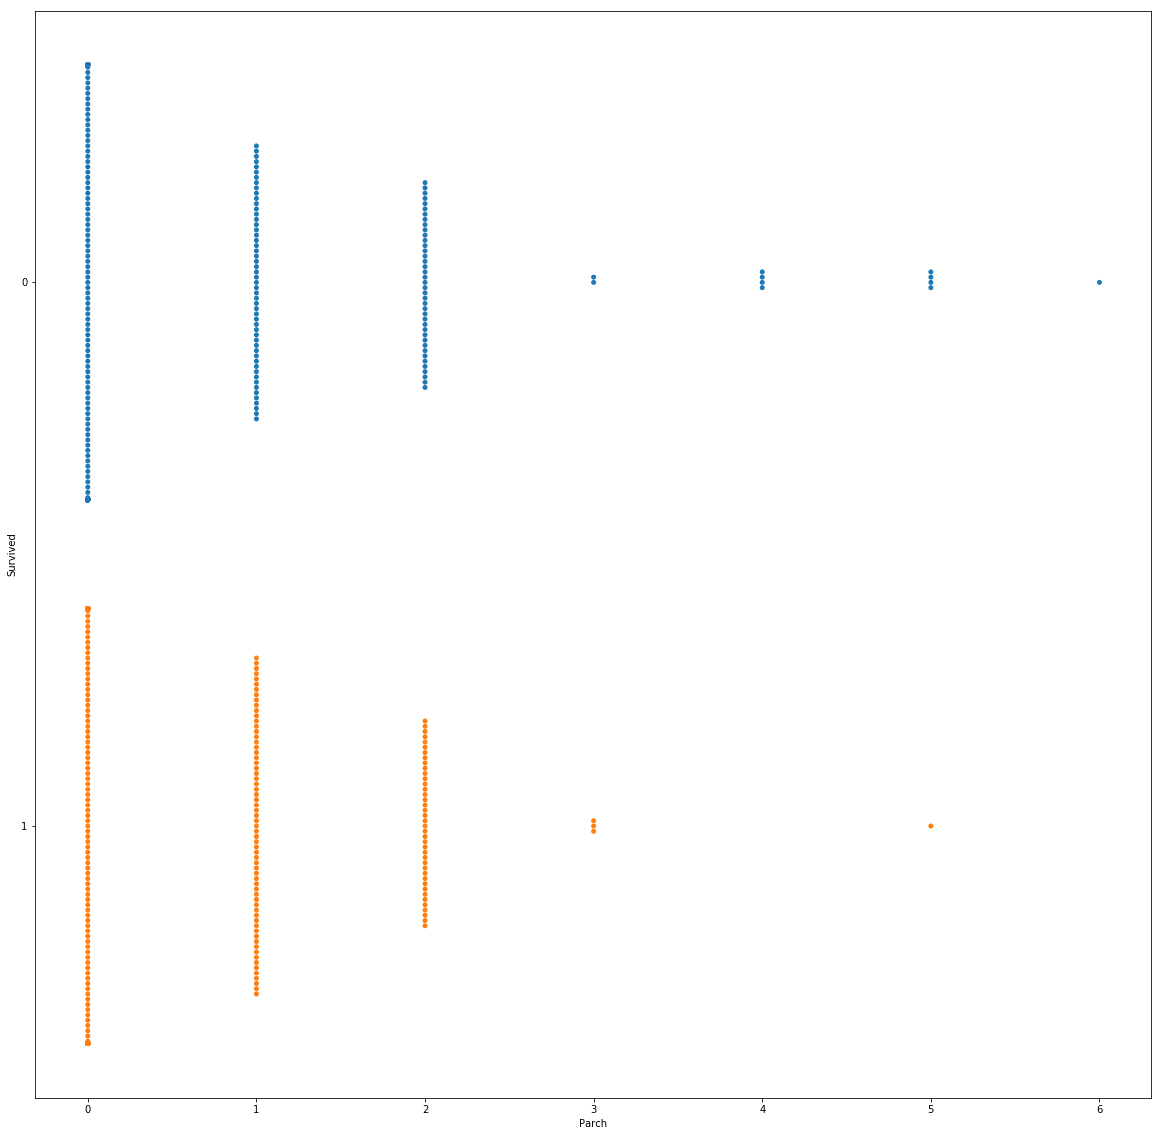

In [25]:
for var in TitanicMedianNumVar:
    f, axes = plt.subplots(1, 1, figsize=(20, 20))
    sb.swarmplot(x = var , y = TitanicMedianCatVar["Survived"], data = TitanicMedianNumVar)

## Uni-Variate Decision Tree of Numerical Variables against Survived

Age v Survived

mean

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6332335329341318

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6502242152466368



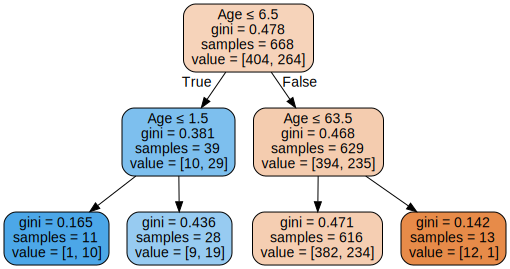

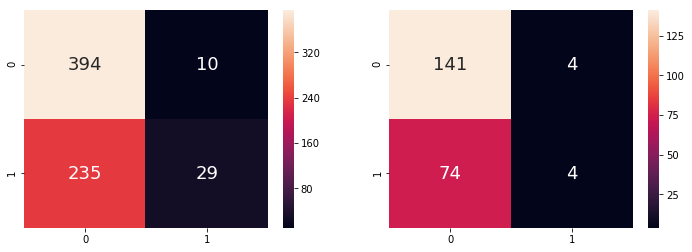

In [26]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

Survived = pd.DataFrame(TitanicMeanCatVar["Survived"])   # Response
Age = pd.DataFrame(TitanicMeanNumVar["Age"])       # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(Age, Survived, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Survived corresponding to Age
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

median

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6482035928143712

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.600896860986547



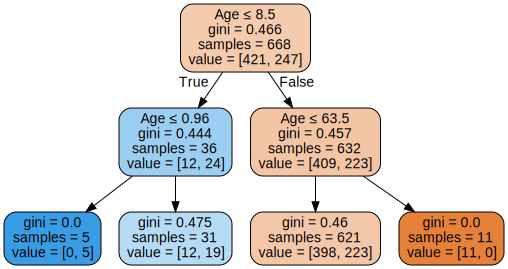

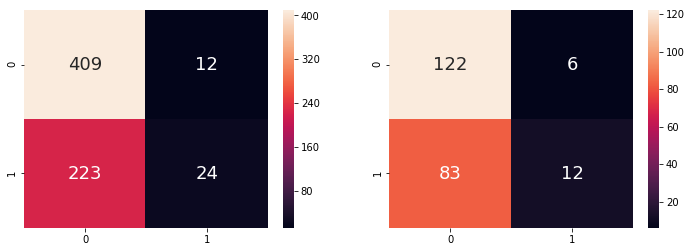

In [27]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

Survived = pd.DataFrame(TitanicMedianCatVar["Survived"])   # Response
Age = pd.DataFrame(TitanicMedianNumVar["Age"])       # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(Age, Survived, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Survived corresponding to Age
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

Fare v Survived

mean

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6766467065868264

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6995515695067265



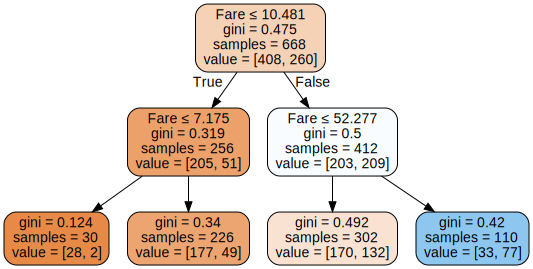

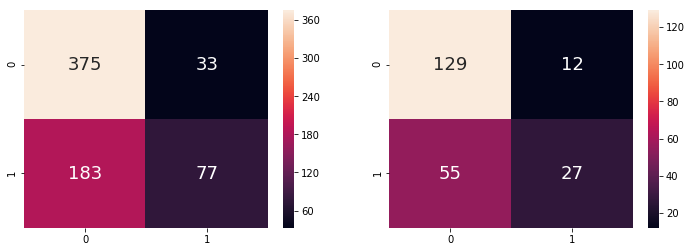

In [28]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

Survived = pd.DataFrame(TitanicMeanCatVar["Survived"])   # Response
Fare = pd.DataFrame(TitanicMeanNumVar["Fare"])       # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(Fare, Survived, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Survived corresponding to Age
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

median

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6631736526946108

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7040358744394619



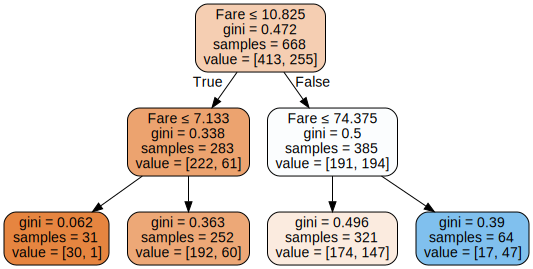

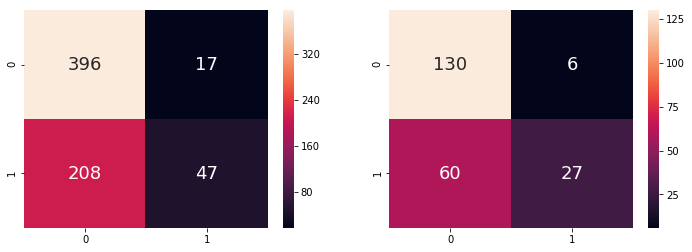

In [29]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

Survived = pd.DataFrame(TitanicMedianCatVar["Survived"])   # Response
Fare = pd.DataFrame(TitanicMedianNumVar["Fare"])       # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(Fare, Survived, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Survived corresponding to Age
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

SibSp v Survived

mean

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6392215568862275

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.547085201793722



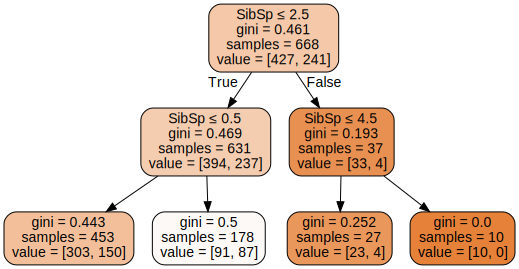

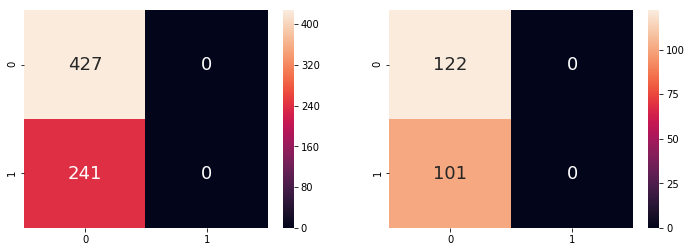

In [30]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

Survived = pd.DataFrame(TitanicMeanCatVar["Survived"])   # Response
SibSp = pd.DataFrame(TitanicMeanNumVar["SibSp"])       # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(SibSp, Survived, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Survived corresponding to Age
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

median

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6362275449101796

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6143497757847534



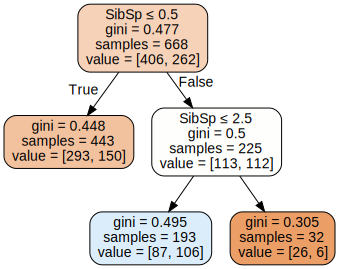

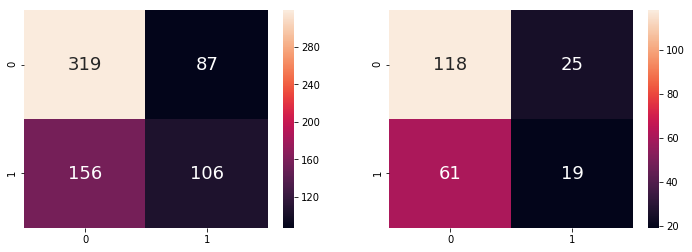

In [31]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

Survived = pd.DataFrame(TitanicMedianCatVar["Survived"])   # Response
SibSp = pd.DataFrame(TitanicMedianNumVar["SibSp"])       # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(SibSp, Survived, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Survived corresponding to Age
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

Parch v Survived

mean

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6362275449101796

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6143497757847534



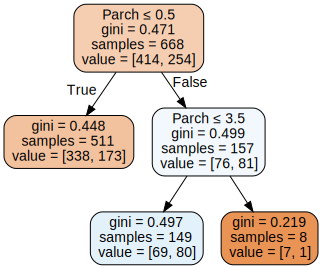

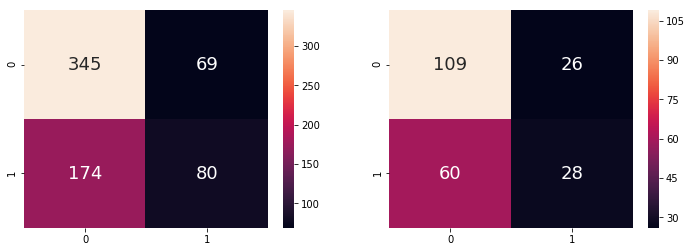

In [32]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

Survived = pd.DataFrame(TitanicMeanCatVar["Survived"])   # Response
Parch = pd.DataFrame(TitanicMeanNumVar["Parch"])       # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(Parch, Survived, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Survived corresponding to Age
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

median

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6272455089820359

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5829596412556054



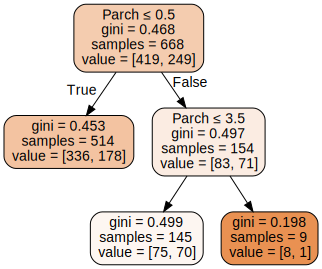

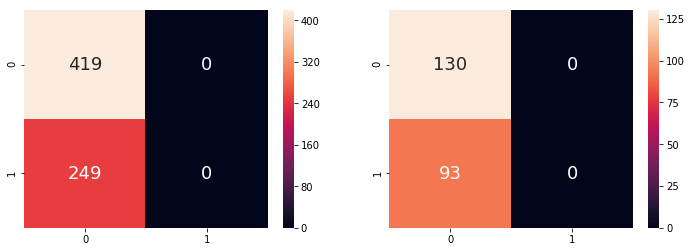

In [33]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

Survived = pd.DataFrame(TitanicMedianCatVar["Survived"])   # Response
Parch = pd.DataFrame(TitanicMedianNumVar["Parch"])       # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(Parch, Survived, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Survived corresponding to Age
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

## Multi-Variate Numerical Variables v Survived

mean

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7440119760479041

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.726457399103139



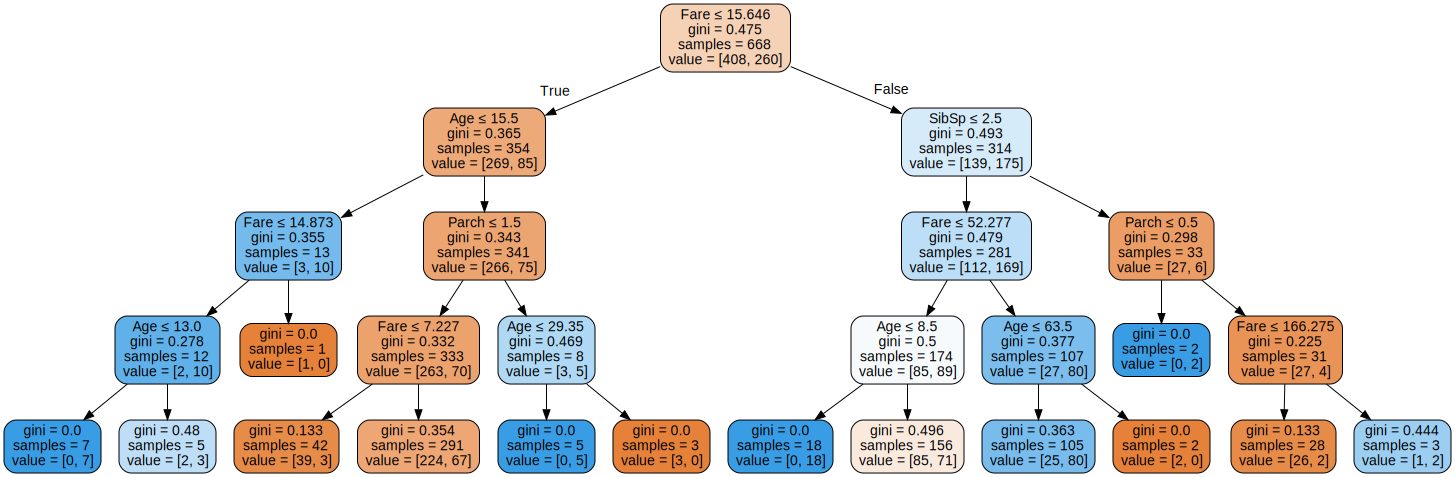

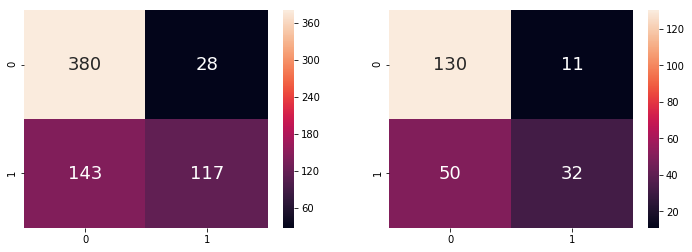

In [34]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

# Extract Response and Predictors
y = pd.DataFrame(TitanicMeanCatVar["Survived"])
X = pd.DataFrame(TitanicMeanNumVar[["Age", "Fare", "SibSp","Parch"]]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

median

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7170658682634731

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.695067264573991



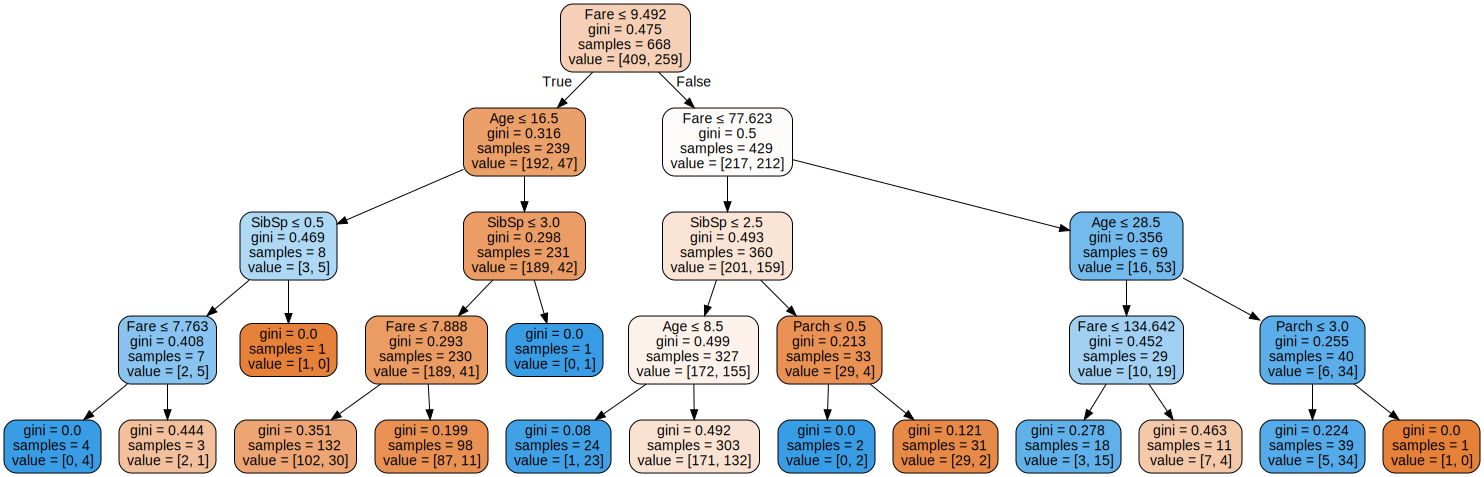

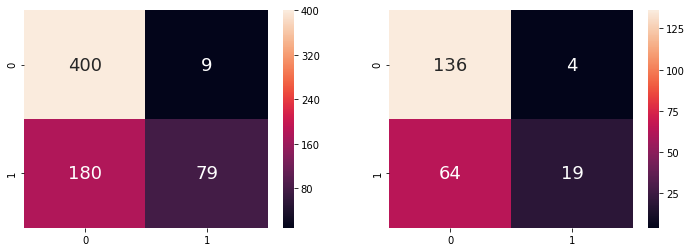

In [35]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

# Extract Response and Predictors
y = pd.DataFrame(TitanicMedianCatVar["Survived"])
X = pd.DataFrame(TitanicMedianNumVar[["Age", "Fare", "SibSp","Parch"]]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

## Multi-Variate Numerical and Categorical variables v Survival

mean

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8293413173652695

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8071748878923767



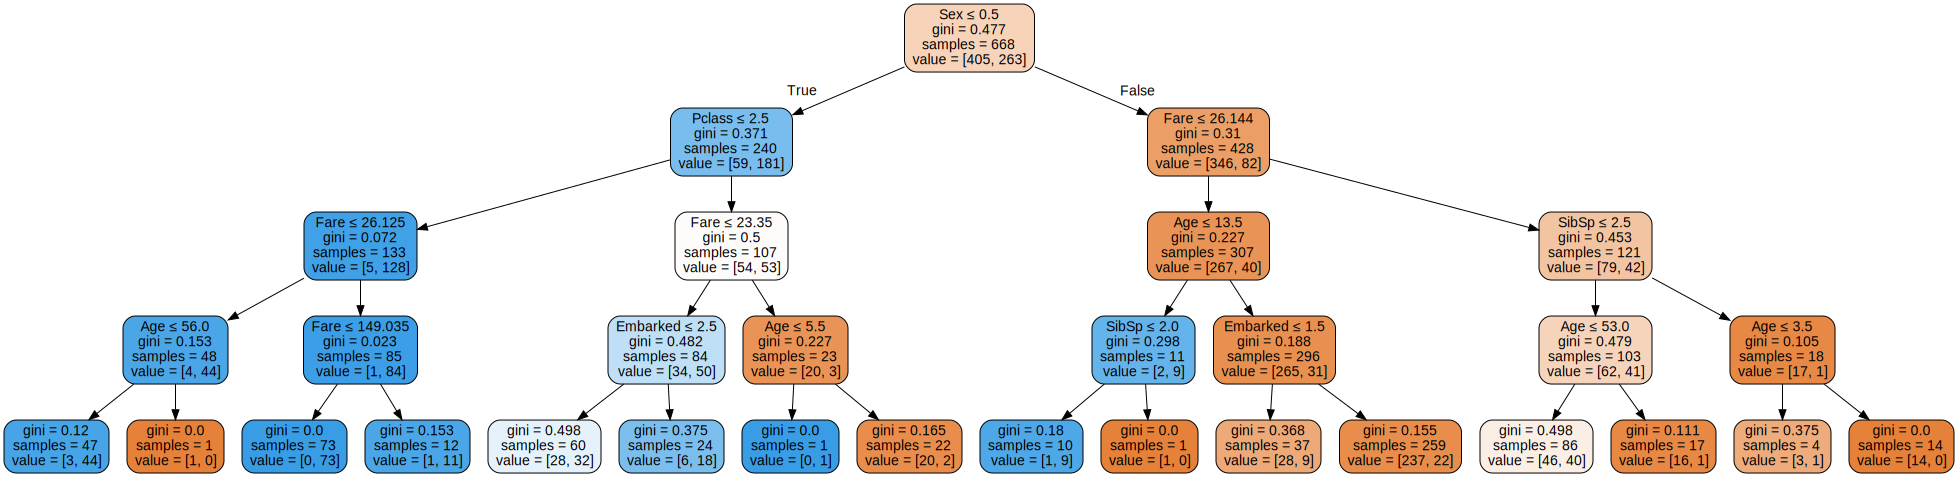

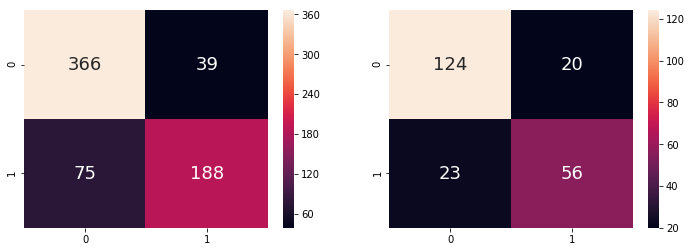

In [36]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

# Extract Response and Predictors
y = pd.DataFrame(TitanicMeanCatVar["Survived"])
X = pd.DataFrame(TitanicMean[["Age", "Fare", "SibSp","Parch", "Sex", "Embarked", "Pclass"]]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

median

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8398203592814372

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8475336322869955



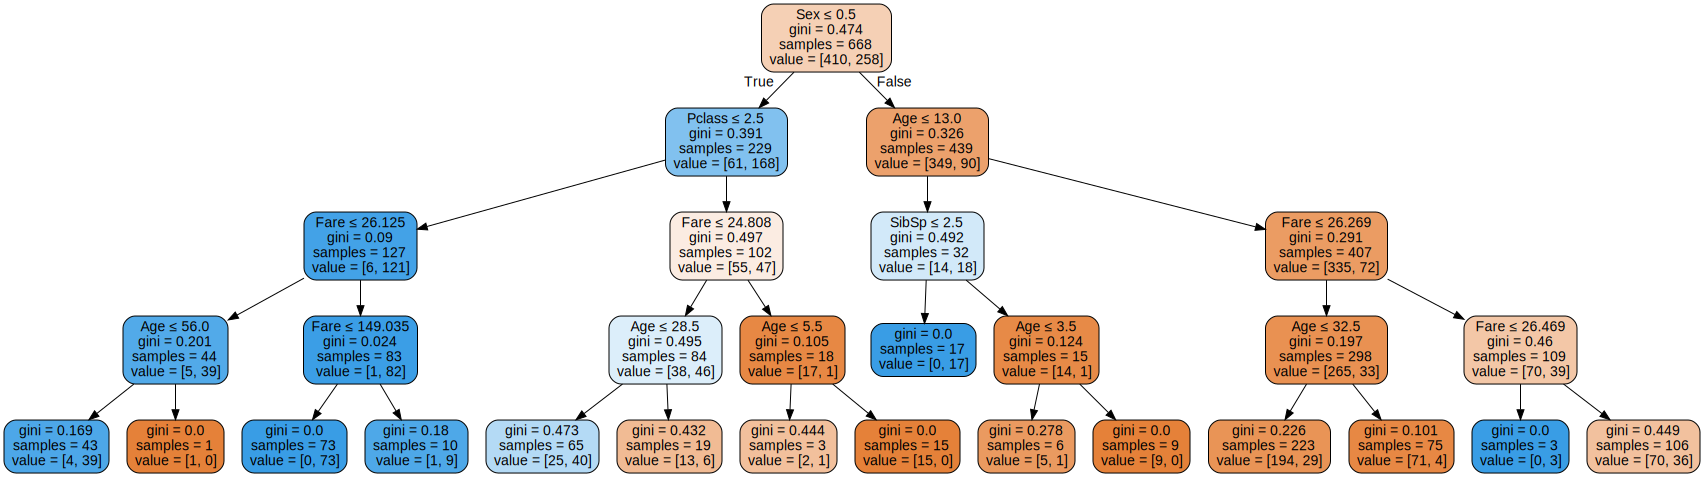

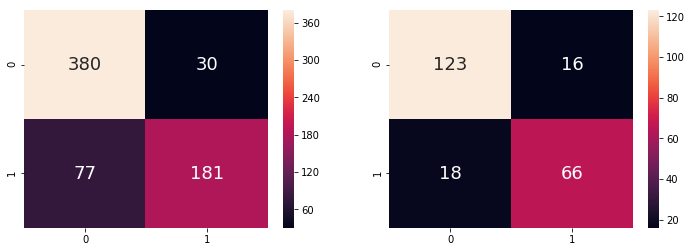

In [37]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

# Extract Response and Predictors
y = pd.DataFrame(TitanicMedianCatVar["Survived"])
X = pd.DataFrame(TitanicMedian[["Age", "Fare", "SibSp","Parch", "Sex", "Embarked", "Pclass"]]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

## Missing Values: Mean or Median?  

Based on decision tree above, we can tell that the Classification Accuracy of the model using dataset which has missing values filled in by Median values is higher than dataset which uses Mean value to fill in missing values. Hence, to test the model on the final test.csv file, it is better to use Median Values to fill in potential missing values in test.csv file.

## Final Test

In [38]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [39]:
test.Sex.replace(to_replace = ['male', 'female'], value = [1, 0], inplace = True)
test.Embarked.replace(to_replace = ['C', 'S', 'Q'], value = [1, 2, 3], inplace = True)

In [40]:
test["Embarked"] = test["Embarked"].fillna(0)
test["Fare"] = test["Fare"].fillna(14.4542)

In [41]:
test['Sex'] = test['Sex'].astype('int64')
test['Embarked'] = test['Embarked'].astype('int64')

In [42]:
test["Age"].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [43]:
test["Fare"].describe()

count    418.000000
mean      35.576535
std       55.850103
min        0.000000
25%        7.895800
50%       14.454200
75%       31.471875
max      512.329200
Name: Fare, dtype: float64

In [44]:
TestMedian = test.copy(deep = True)

In [45]:
TestMedian["Age"] =  TestMedian["Age"].fillna(27.0)

In [46]:
TestMedian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


## Testing out Model to see who survives

In [47]:
dectree.predict(TestMedian[["Age", "Fare", "SibSp", "Parch", "Sex", "Embarked", "Pclass"]])

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

So, the prediction is done. now we append it to the Dataset to find out distribution of survivors.

In [48]:
TestMedian['Survived'] = dectree.predict(TestMedian[["Age", "Fare", "SibSp","Parch", "Sex", "Embarked", "Pclass"]])

# These are some questions that my data science assignment requires me to answer :)

## How many survivors?

In [49]:
TestMedian['Survived'].value_counts()

0    274
1    144
Name: Survived, dtype: int64

## i) How many survivors were female?

In [50]:
femaleData = TestMedian[TestMedian['Sex'] == 0]
femaleData['Survived'].value_counts()

1    132
0     20
Name: Survived, dtype: int64

138 out of 152 women survived

## How many survivors were male?

In [51]:
maleData = TestMedian[TestMedian['Sex'] == 1]
maleData['Survived'].value_counts()

0    254
1     12
Name: Survived, dtype: int64

9 out of 266 men survived. What gentlemen the rest of them were.  
## Press F to pay respect.

## ii) How many survivors were under the age of 18?

In [52]:
ageData = TestMedian[TestMedian['Age'] < 18.0]
ageData['Survived'].value_counts()

1    28
0    13
Name: Survived, dtype: int64

30 survivors were under the age of 18

## iii) How many had no other family members on board?

In [53]:
NoRelativeData = TestMedian[(TestMedian['SibSp'] == 0) & (TestMedian['Parch'] == 0)]
NoRelativeData['Survived'].value_counts()

0    193
1     60
Name: Survived, dtype: int64

64 of the survivors had no siblings, spouses, parents, or children on board

## iv) Passengers of which class were least likely to survive?

In [54]:
PclassDat1 = TestMedian[TestMedian['Pclass'] == 1]
PclassDat1['Survived'].value_counts()

0    55
1    52
Name: Survived, dtype: int64

In [55]:
PclassDat2 = TestMedian[TestMedian['Pclass'] == 2]
PclassDat2['Survived'].value_counts()

0    62
1    31
Name: Survived, dtype: int64

In [56]:
PclassDat3 = TestMedian[TestMedian['Pclass'] == 3]
PclassDat3['Survived'].value_counts()

0    157
1     61
Name: Survived, dtype: int64

1st class passengers were most likely to survive with 47.7% chance of survival  
2nd class passengers came in second with a 32.3% chance of survival  
3rd class passengers were least likely to survive with 30.3% chance of survival

## v) Which port of embarkment had the least chance of survival?

In [57]:
embarkDat1 = TestMedian[TestMedian['Embarked'] == 1]
embarkDat1['Survived'].value_counts()

0    60
1    42
Name: Survived, dtype: int64

In [58]:
embarkDat2 = TestMedian[TestMedian['Embarked'] == 2]
embarkDat2['Survived'].value_counts()

0    188
1     82
Name: Survived, dtype: int64

In [59]:
embarkDat3 = TestMedian[TestMedian['Embarked'] == 3]
embarkDat3['Survived'].value_counts()

0    26
1    20
Name: Survived, dtype: int64

Chebourg, 1, had a moderate survival rate of 39.2%  
Queenstown, 2, had the lowest survival rate of 31.1%  
Southampton, 3, had the highest survival rate of 50%  

In [60]:
submission = pd.DataFrame({"PassengerId": TestMedian["PassengerId"],"Survived": TestMean["Survived"]})
submission.to_csv('submission.csv', index=False)

NameError: name 'TestMean' is not defined